<a href="https://colab.research.google.com/github/GVilok/ml/blob/main/Lab2_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Notebook for Lab 2

## Q1-3: Matrix Operations and Pseudo-Inverse

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import files  # For file upload in Colab

# Upload the Excel file
uploaded = files.upload()

# Extract the uploaded filename
file_name = list(uploaded.keys())[0]

# Read the Excel file
data_selected = pd.read_excel(file_name)

# Ensure all values in A and C are numeric
A = data_selected.iloc[:, 0:3].apply(pd.to_numeric, errors='coerce').values  # Convert to numbers
C = data_selected.iloc[:, 3].apply(pd.to_numeric, errors='coerce').values   # Convert to numbers

# Handle missing values (if any)
A = np.nan_to_num(A)  # Replace NaN with 0
C = np.nan_to_num(C)

# Print matrix shapes
print("Shape of A:", A.shape)
print("Shape of C:", C.shape)
print("Rows in A:", len(A))
print("Rows in C:", len(C))

# Compute and print rank of A
print("Rank of A:", np.linalg.matrix_rank(A))

# Compute the pseudo-inverse of A
A_pinv = np.linalg.pinv(A)
print("Shape of pseudo-inverse of A:", A_pinv.shape)

# Solve for X in AX = C
X = np.dot(A_pinv, C)
print("Shape of X:", X.shape)
print("Values of X:", X)

# Optional: Add a new column to classify customers based on payment amount
if 'Payment (Rs)' in data_selected.columns:  # Check if the column exists
    data_selected['Cost_Effectiveness'] = data_selected['Payment (Rs)'].apply(lambda x: 'Rich' if x > 200 else 'Poor')

# Save updated data to an Excel file
output_file = 'Updated_Purchase_Data.xlsx'
data_selected.to_excel(output_file, index=False)

# Read and display the updated data
updated_data = pd.read_excel(output_file)
print(updated_data.iloc[:, :6])  # Show first 6 columns


Saving Lab Session Data.xlsx to Lab Session Data (3).xlsx
Shape of A: (10, 3)
Shape of C: (10,)
Rows in A: 10
Rows in C: 10
Rank of A: 2
Shape of pseudo-inverse of A: (3, 10)
Shape of X: (3,)
Values of X: [ 0.          0.20783056 -0.37136416]
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16    

## Q4: Stock Data Analysis

Saving Lab Session Data.xlsx to Lab Session Data (5).xlsx
Columns in dataset: Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')
Mean of Prices: 1560.66
Variance of Prices: 58732.37
Mean Price on Wednesdays: 1550.71
Difference from overall mean: 9.96
Column 'Mon' not found!
Probability of Loss: 0.498
Probability of Profit on Wednesday: 0.084
Conditional Probability of Profit (Given Wednesday): 0.420


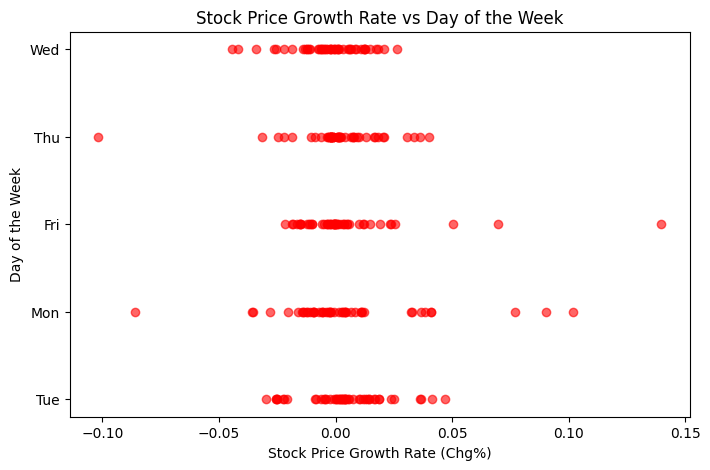

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import statistics as stat
import math
import matplotlib.pyplot as plt
from google.colab import files  # For file upload in Colab

# Upload the Excel file
uploaded = files.upload()

# Extract the uploaded filename
file_name = list(uploaded.keys())[0]

# Load the Excel file and select the correct sheet
data_selected = pd.read_excel(file_name, sheet_name="IRCTC Stock Price")

# 🔹 Fix: Check column names to avoid KeyErrors
print("Columns in dataset:", data_selected.columns)

# 🔹 Fix: Remove extra spaces from column names
data_selected.columns = data_selected.columns.str.strip()

# ✅ A4 - 1: Calculate Mean & Variance of Price
if 'Price' in data_selected.columns:
    mean_price = stat.mean(data_selected['Price'])
    variance_price = stat.variance(data_selected['Price'])
    print(f"Mean of Prices: {mean_price:.2f}")
    print(f"Variance of Prices: {variance_price:.2f}")
else:
    print("Column 'Price' not found!")

# ✅ A4 - 2: Calculate Mean Price for Wednesdays & Compare
if 'Day' in data_selected.columns:
    wed_data = data_selected[data_selected['Day'] == "Wed"]

    if not wed_data.empty:
        mean_wed_price = stat.mean(wed_data['Price'])
        print(f"Mean Price on Wednesdays: {mean_wed_price:.2f}")
        print(f"Difference from overall mean: {abs(mean_price - mean_wed_price):.2f}")
    else:
        print("No data available for Wednesdays.")
else:
    print("Column 'Day' not found!")

# ✅ A4 - 3: Calculate Mean Price for April & Compare
if 'Mon' in data_selected.columns:
    april_data = data_selected[data_selected['Mon'] == "Apr"]

    if not april_data.empty:
        mean_april_price = stat.mean(april_data['Price'])
        print(f"Mean Price in April: {mean_april_price:.2f}")
        print(f"Difference from overall mean: {abs(mean_price - mean_april_price):.2f}")
    else:
        print("No data available for April.")
else:
    print("Column 'Mon' not found!")

# ✅ A4 - 4: Probability of Loss (Chg% < 0)
if 'Chg%' in data_selected.columns:
    loss_prob = (lambda x: sum(x < 0) / len(x))(data_selected['Chg%'])
    print(f"Probability of Loss: {loss_prob:.3f}")
else:
    print("Column 'Chg%' not found!")

# ✅ A4 - 5: Probability of Profit on Wednesday
if 'Chg%' in data_selected.columns and not wed_data.empty:
    profit_wed = (lambda x: sum(x > 0) / len(data_selected))(wed_data['Chg%'])
    print(f"Probability of Profit on Wednesday: {profit_wed:.3f}")

# ✅ A4 - 6: Conditional Probability of Profit given Wednesday
if 'Chg%' in data_selected.columns and not wed_data.empty:
    conditional_profit_wed = (lambda x: sum(x > 0) / len(x))(wed_data['Chg%'])
    print(f"Conditional Probability of Profit (Given Wednesday): {conditional_profit_wed:.3f}")

# ✅ A4 - 7: Scatter Plot - Chg% vs Day of Week
if 'Chg%' in data_selected.columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(data_selected['Chg%'], data_selected['Day'], color='red', alpha=0.6)
    plt.xlabel('Stock Price Growth Rate (Chg%)')
    plt.ylabel('Day of the Week')
    plt.title("Stock Price Growth Rate vs Day of the Week")
    plt.show()
else:
    print("Column 'Chg%' not found! Cannot plot scatter graph.")


## Q5-7: Data Exploration and Normalization

Saving Lab Session Data.xlsx to Lab Session Data (8).xlsx


<ipython-input-17-17dc30fa1c02>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("?", np.nan, inplace=True)



Numerical Columns: ['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
Categorical Columns: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'Condition']

Data after encoding:
   Record ID  age  sex  on thyroxine  query on thyroxine  \
0  840801013   29  0.0             0                   0   
1  840801014   29  0.0             0                   0   
2  840801042   41  0.0             0                   0   
3  840803046   36  0.0             0                   0   
4  840803047   32  0.0             0                   0   

   on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  \
0                          0     0         0                0              

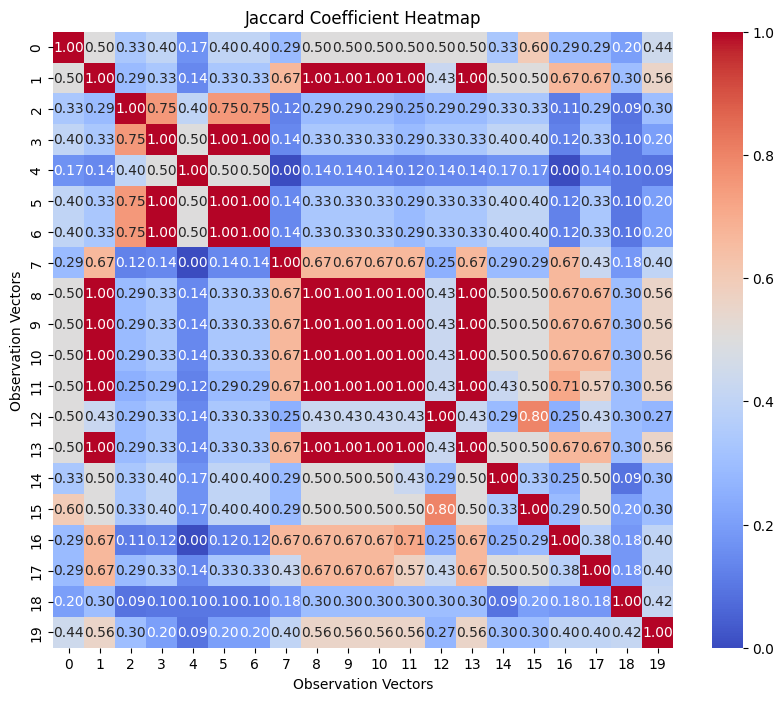

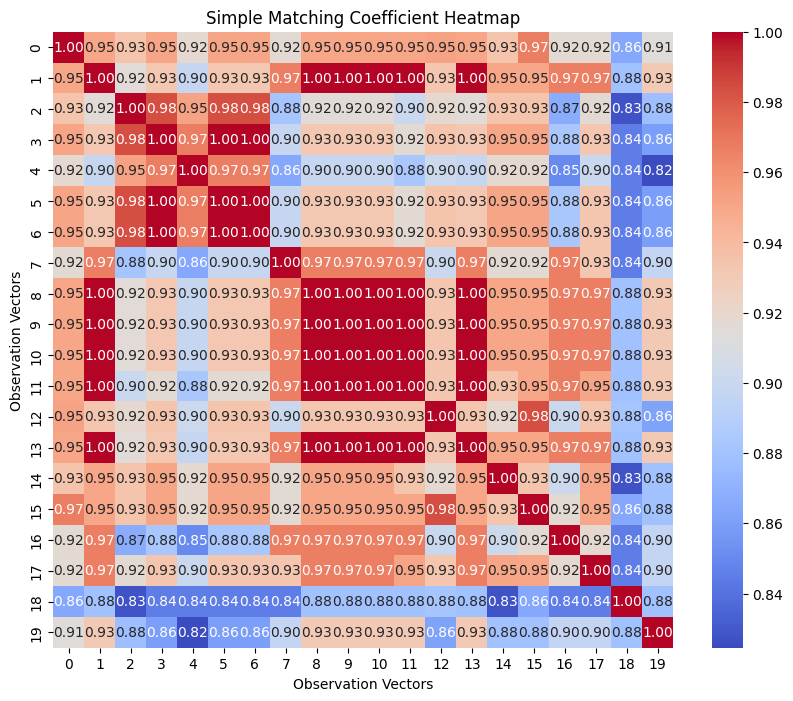

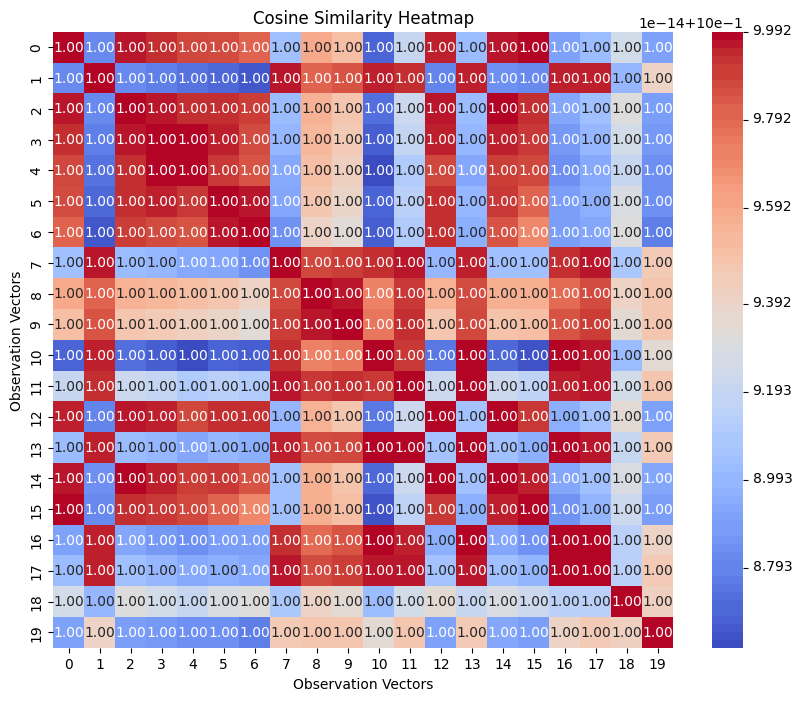

In [17]:
# ✅ Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.preprocessing import MinMaxScaler
from google.colab import files  # Google Colab File Upload

# ✅ Upload the Excel file
uploaded = files.upload()

# ✅ Extract the filename dynamically
file_name = list(uploaded.keys())[0]

# ✅ Read the Excel file (Make sure to specify the correct sheet name)
df = pd.read_excel(file_name, sheet_name=2)  # Adjust sheet_name accordingly

# ✅ Replace missing values represented as "?"
df.replace("?", np.nan, inplace=True)

# ✅ Identify categorical and numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

# ✅ Encoding categorical data
encoded_df = df.copy()

# 🔹 Binary Encoding for two-category variables
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    encoded_df[col] = encoded_df[col].map({"t": 1, "f": 0, "F": 0, "M": 1})

# 🔹 One-Hot Encoding for Nominal Variables
nominal_cols = list(set(cat_cols) - set(binary_cols))
encoded_df = pd.get_dummies(encoded_df, columns=nominal_cols, drop_first=True)

print("\nData after encoding:")
print(encoded_df.head())

# ✅ Data range for numerical variables
num_ranges = df[num_cols].agg(["min", "max"])
print("\nRange of numerical values:")
print(num_ranges)

# ✅ Missing values check
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# ✅ Outlier detection using IQR
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

outliers = {col: detect_outliers(col) for col in num_cols}
print("\nOutliers detected:")
for col, outlier_vals in outliers.items():
    if not outlier_vals.empty:
        print(f"{col}: {outlier_vals.values}")

# ✅ Mean, Variance, Standard Deviation
mean_values = df[num_cols].mean()
variance_values = df[num_cols].var()
std_values = df[num_cols].std()

print("\nMean values:\n", mean_values)
print("\nVariance values:\n", variance_values)
print("\nStandard deviation values:\n", std_values)

# ✅ A6: Data Imputation
for col in num_cols:
    if col in outliers and not outliers[col].empty:
        df[col] = df[col].fillna(df[col].median())  # Median for attributes with outliers
    else:
        df[col] = df[col].fillna(df[col].mean())  # Mean for attributes without outliers

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Mode for categorical attributes

# ✅ A7: Data Normalization using Min-Max Scaling
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nData after normalization:")
print(df.head())

# ✅ A8 & A9: JC, SMC, Cosine Similarity for the first two vectors
def compute_dependents(v1, v2):
    m11 = np.sum((v1 == 1) & (v2 == 1))
    m00 = np.sum((v1 == 0) & (v2 == 0))
    m10 = np.sum((v1 == 1) & (v2 == 0))
    m01 = np.sum((v1 == 0) & (v2 == 1))
    return [m11, m00, m10, m01]

def compute_jc_smc(v1, v2):
    calc = compute_dependents(v1, v2)
    jc = calc[0] / (calc[0] + calc[2] + calc[3]) if (calc[0] + calc[2] + calc[3]) != 0 else 0
    smc = (calc[0] + calc[1]) / sum(calc) if sum(calc) != 0 else 0
    return jc, smc

# ✅ Convert the dataframe to numeric (coerce errors to NaN, then fill missing values with 0)
df_numeric = encoded_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# ✅ Select first two observation vectors (only numeric values)
r1, r2 = df_numeric.iloc[0].astype(float).values, df_numeric.iloc[1].astype(float).values

# ✅ Compute Cosine Similarity
cos_sim = 1 - cosine(r1, r2)

print("\nCosine Similarity:", cos_sim)

# ✅ Compute Jaccard and SMC
calc = compute_dependents(r1, r2)
jc, smc = compute_jc_smc(r1, r2)
print("\nJaccard Score:", jc)
print("\nSMC for 2 vectors:", smc)

# ✅ A10: Heatmap of Similarity Measures for first 20 vectors
df_subset = df_numeric.iloc[:20].values
n = len(df_subset)

# Compute JC, SMC, Cosine Similarity matrices
def compute_pairwise(df_subset, n):
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cos_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                jc_matrix[i, j] = 1
                smc_matrix[i, j] = 1
                cos_matrix[i, j] = 1
            else:
                v1, v2 = df_subset[i], df_subset[j]
                jc, smc = compute_jc_smc(v1, v2)
                cos_sim = 1 - cosine(v1, v2)
                jc_matrix[i, j] = jc
                smc_matrix[i, j] = smc
                cos_matrix[i, j] = cos_sim
    return jc_matrix, smc_matrix, cos_matrix

jc_matrix, smc_matrix, cos_matrix = compute_pairwise(df_subset, n)

# ✅ Plot Heatmaps
def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.xlabel("Observation Vectors")
    plt.ylabel("Observation Vectors")
    plt.show()

plot_heatmap(jc_matrix, "Jaccard Coefficient Heatmap")
plot_heatmap(smc_matrix, "Simple Matching Coefficient Heatmap")
plot_heatmap(cos_matrix, "Cosine Similarity Heatmap")
